In [1]:
import numpy as np
from sklearn.neighbors import BallTree
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
class ArrayStats():
    def __init__(self):
        self.data = None
        self.mean = None
        self.mode = None
        self.var = None
        self.stdev = None
    def fit(self, X):
        self.data = X
        self.mean_f()
        self.mode_f()
        self.var_f()
    def mean_f(self):
        self.mean = E_X(self.data)
    def mode_f(self):
        if self.data.ndim > 1:
            ms_alg = MeanShift()
            ms_alg.fit(self.data)
            self.mode = ms_alg.return_modes()
        else:
            vals,counts = np.unique(self.data, return_counts = True)
            self.mode = vals[counts == counts.max()]    
    def var_f(self):
        mean_array = np.tile(self.mean, (len(self.data),1))
        sq_deviation_array = (self.data - mean_array)**2
        variance = E_X(sq_deviation_array)
        sigma = np.sqrt(variance)
        self.var = variance
        self.stdev = sigma
    def stats(self):
        print('Mean = {}\n'.format(self.mean))
        print('Mode = {}\n'.format(self.mode))
        print('Var = {}\n'.format(self.var))

In [3]:
def E_X(x_array, p_array = None):
    if p_array:
        E_X = x_array.T.dot(np.expand_dims(p_array,axis = 1))
    else:
        E_X = np.mean(x_array, axis = 0)
    return E_X
def gaussian_kernel(x, x_, sigma = 1):
    sq_dist = np.linalg.norm(x-x_)**2
    rbf = np.exp(-0.5*sq_dist/(sigma**2))
    return rbf
def flat_kernel(x,x_,r = 1):
    if np.linalg.norm(x-x_) <= r:
        return 1
    else:
        return 0

class MeanShift:
    def __init__(self, kernel = flat_kernel, free_param = 1, num_decimal_pts = 4):
        self.X = None
        self.mX = None
        self.k = kernel
        self.free_param = free_param
    def fit(self, X, max_itr = 500):
        self.X = set([tuple(x) for x in X])
        for itr in range(max_itr):
            self.shift()
    def shift(self):
        X_array = np.array(list(self.X))
        neighbors = BallTree(X_array).query_radius(X_array, r = self.free_param)
        self.mX = set()
        for idx, x in enumerate(X_array):
            Nx = X_array[neighbors[idx]]
            weighted_sum = float(0)
            sum_of_weights = float(0)
            for x_i in Nx:
                w_i = self.k(x_i,x, self.free_param)
                weighted_sum += w_i*x_i
                sum_of_weights += w_i
            m_x = weighted_sum / sum_of_weights
            self.mX.add(tuple(np.round(m_x, decimals = 4)))
        self.X = self.mX
    def return_modes(self):
        modes = np.array(list(self.mX))
        return modes

In [4]:
X, _ = make_blobs(n_samples = 500, centers = 5, cluster_std = 0.60)

In [5]:
data_stats = ArrayStats()
data_stats.fit(X)

In [6]:
mean = data_stats.mean
mode = data_stats.mode

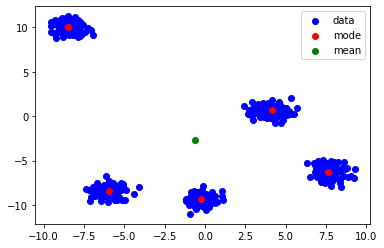

In [11]:
plt.figure()
plt.scatter(X[:,0],X[:,1], c = 'b', label = 'data')
plt.scatter(mode[:,0], mode[:,1],c = 'r', label = 'mode')
plt.scatter(mean[0], mean[1], c = 'g', label = 'mean')
plt.legend()
plt.show()

In [8]:
#Meanshift does a good job of finding the modes without specifying the number of clusters